<a href="https://www.kaggle.com/code/ormoshe20/titanic-machine-learning-from-disaster?scriptVersionId=125687070" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
from category_encoders import BinaryEncoder

# import linear_model and train with NE
from sklearn import linear_model

# import metrics and calculate MSE and RMSE
from sklearn import metrics

# import pipeline and preprocessing from sklearn, standardize the features
# and run SGD on the data
from sklearn import pipeline, preprocessing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data Investigation and Perprocessing

In [157]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [158]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [159]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Removing unnecessery features**

In [160]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Checking for missing values

**train_data:**

In [161]:
null_values = train_data.isna().sum().sort_values(ascending=False)
total_count = len(train_data) 
#calculate the percentage for the current column 
missing_percentage = round((null_values / total_count) * 100, 2)
pd.DataFrame({'NaN: %': missing_percentage}).head()

,NaN: %
Cabin,77.10
Age,19.87
Embarked,0.22
PassengerId,0.00
Survived,0.00


**test_data:**

In [162]:
null_values = test_data.isna().sum().sort_values(ascending=False)
total_count = len(test_data) 
#calculate the percentage for the current column 
missing_percentage = round((null_values / total_count) * 100, 2)
pd.DataFrame({'NaN: %': missing_percentage}).head()

,NaN: %
Cabin,78.23
Age,20.57
Fare,0.24
PassengerId,0.00
Pclass,0.00


# Data manipulation

changing sex to category: 'male': 1, 'female': 0

In [163]:
train_data['Sex_Num'] = train_data['Sex'].map({'male': 1, 'female': 0})
train_data['Embarked'] = train_data['Embarked'].map({'C': 1, 'S': 2, 'Q': 2})

In [164]:
test_data['Sex_Num'] = test_data['Sex'].map({'male': 1, 'female': 0})
test_data['Embarked'] = test_data['Embarked'].map({'C': 1, 'S': 2, 'Q': 2})

**transfer cabin to numeric**

In [165]:
# Fill missing Cabin values with 'Unknown'
train_data['Cabin'].fillna('Unknown', inplace=True)

# Extract the first letter of the Cabin code to create a new column
train_data['Cabin_Code'] = train_data['Cabin'].str[0]

# Use One-Hot encoding to create binary features for each Cabin code
cabin_dummies = pd.get_dummies(train_data['Cabin_Code'], prefix='Cabin')

# Add the binary features to the original dataset
train_data = pd.concat([train_data, cabin_dummies], axis=1)

# Drop the original Cabin and Cabin_Code columns
train_data.drop(['Cabin', 'Cabin_Code'], axis=1, inplace=True)

In [166]:
# Fill missing Cabin values with 'Unknown'
test_data['Cabin'].fillna('Unknown', inplace=True)

# Extract the first letter of the Cabin code to create a new column
test_data['Cabin_Code'] = test_data['Cabin'].str[0]

# Use One-Hot encoding to create binary features for each Cabin code
cabin_dummies = pd.get_dummies(test_data['Cabin_Code'], prefix='Cabin')

# Add the binary features to the original dataset
test_data = pd.concat([test_data, cabin_dummies], axis=1)

# Drop the original Cabin and Cabin_Code columns
test_data.drop(['Cabin', 'Cabin_Code'], axis=1, inplace=True)

# Inserting missing values

**insert mean to Age**

In [167]:
# Calculate the mean age using only non-null values of 'Age'
mean_age = train_data['Age'].mean(skipna=True)
train_data['Age_Mean'] = train_data['Age']
# Fill null values in 'Age_imputed' with the mean age
train_data['Age_Mean'].fillna(mean_age, inplace=True)

**inserting median to Age**

In [168]:
# Calculate the median age using only non-null values of 'Age'
median_age = train_data['Age'].median(skipna=True)
train_data['Age_Median'] = train_data['Age']
# Fill null values in 'Age_imputed' with the mean age
train_data['Age_Median'].fillna(median_age, inplace=True)

**insert random number to Age**

In [169]:
train_data_not_null = train_data[~train_data['Age'].isnull()]
train_data_null = train_data[train_data['Age'].isnull()]
options = np.random.choice(train_data_not_null['Age'])
train_data['Age_Random'] = train_data['Age'].apply(lambda x: np.random.choice(train_data_not_null['Age']) if pd.isnull(x) else x)

**insert mean to Embarked**

In [170]:
# Calculate the mean age using only non-null values of 'Embarked'
mean_Embarked = train_data['Embarked'].mean(skipna=True)
train_data['Embarked_Mean'] = train_data['Embarked']
# Fill null values in 'Age_imputed' with the mean age
train_data['Embarked_Mean'].fillna(mean_age, inplace=True)

**inserting median to Embarked**

In [171]:
# Calculate the median age using only non-null values of 'Age'
median_Embarked = train_data['Embarked'].median(skipna=True)
train_data['Embarked_Median'] = train_data['Embarked']
# Fill null values in 'Age_imputed' with the mean age
train_data['Embarked_Median'].fillna(median_Embarked, inplace=True)

**insert random number to Embarked**

In [172]:
train_data_not_null = train_data[~train_data['Embarked'].isnull()]
train_data_null = train_data[train_data['Embarked'].isnull()]
options = np.random.choice(train_data_not_null['Embarked'])
train_data['Embarked_Random'] = train_data['Embarked'].apply(lambda x: np.random.choice(train_data_not_null['Embarked']) if pd.isnull(x) else x)

# Add Features

In [173]:
train_data['Is_Child'] = (train_data['Age'] < 18).astype(int)
train_data['Passenger_Age_Type'] = train_data['Age'].apply(lambda x: 'Adult' if x > 18 else 'Child')

In [174]:
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch']

In [175]:
# Calculate the average fare
fare_avg = train_data['Fare'].mean()
train_data['Is_Expansive_Ticket'] = (train_data['Fare'] > fare_avg).astype(int)
print("Average fare: ${:.2f}".format(fare_avg))

Average fare: $32.20


****train_data****

In [176]:
train_data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Mean,Age_Median,Age_Random,Embarked_Mean,Embarked_Median,Embarked_Random,Is_Child,Passenger_Age_Type,Family_Size,Is_Expansive_Ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,22.000000,22.0,22.0,2.0,2.0,2.0,0,Adult,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,38.000000,38.0,38.0,1.0,1.0,1.0,0,Adult,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,26.000000,26.0,26.0,2.0,2.0,2.0,0,Adult,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,35.000000,35.0,35.0,2.0,2.0,2.0,0,Adult,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,35.000000,35.0,35.0,2.0,2.0,2.0,0,Adult,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,29.699118,28.0,15.0,2.0,2.0,2.0,0,Child,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,54.000000,54.0,54.0,2.0,2.0,2.0,0,Adult,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,2.000000,2.0,2.0,2.0,2.0,2.0,1,Child,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,27.000000,27.0,27.0,2.0,2.0,2.0,0,Adult,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,14.000000,14.0,14.0,1.0,1.0,1.0,1,Child,1,0


**test_data**

In [177]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Num,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,2,1,0,0,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,2,0,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,2,1,0,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,2,1,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,2,0,0,0,0,0,0,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,2,1,0,0,0,0,0,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,2,0,0,0,0,0,0,0,0,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,2,1,0,0,0,0,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,1,0,0,0,0,0,0,0,0,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,2,1,0,0,0,0,0,0,0,1


# Data Visualization using seaborn and matplotlib
We want to:

see how the target depends on each feature.
detect the most meaningful features.
We can plot the connection between each feature to the target values (Survived).

We can plot all the connections between a feature and the target values, on one graph or in a few sub-plots.

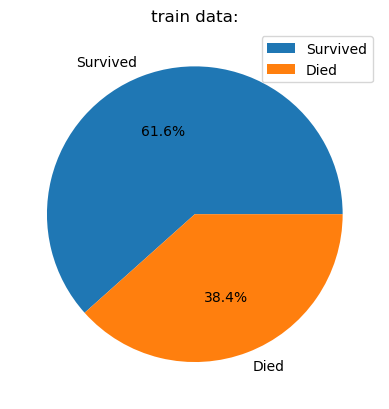

In [178]:
survived = train_data['Survived'].value_counts()
plt.pie(survived, autopct="%1.1f%%", labels=['Survived', 'Died'])
plt.legend(['Survived', 'Died'])
plt.title('train data:')
plt.show()

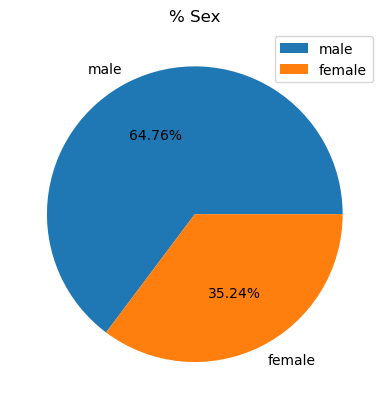

In [179]:
sex = train_data['Sex'].value_counts()
plt.pie(sex, autopct="%1.2f%%", labels=['male','female'])
plt.legend(['male', 'female'])
plt.title("% Sex")
plt.show()

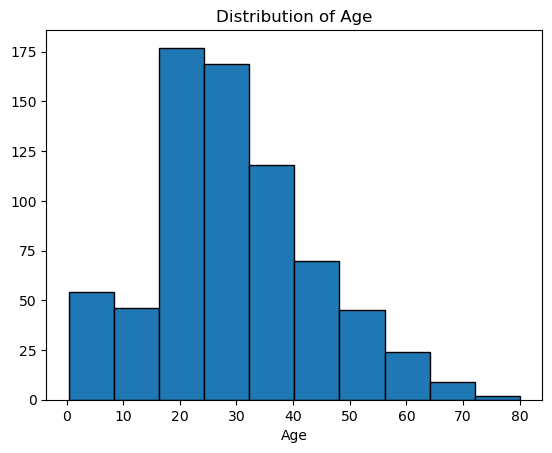

In [180]:
plt.hist(train_data['Age'], edgecolor='black', linewidth=1)
plt.title('Distribution of Age')
plt.xlabel('Age');

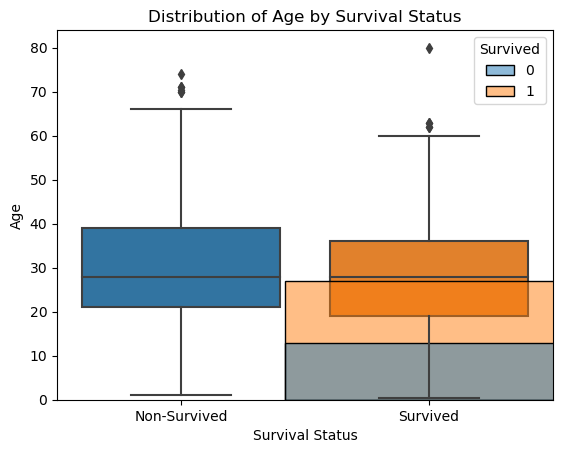

In [181]:
# Create a histogram of age by survival status
g = sns.histplot(data=train_data, x='Age', hue='Survived', kde=False)
g.set(xlabel='Age', ylabel='Frequency', title='Distribution of Age by Survival Status')

# Create a box plot of age by survival status
g = sns.boxplot(data=train_data, x='Survived', y='Age')
g.set(xlabel='Survival Status', ylabel='Age', title='Distribution of Age by Survival Status')
g.set_xticklabels(['Non-Survived', 'Survived'])

# Show the plots
plt.show()

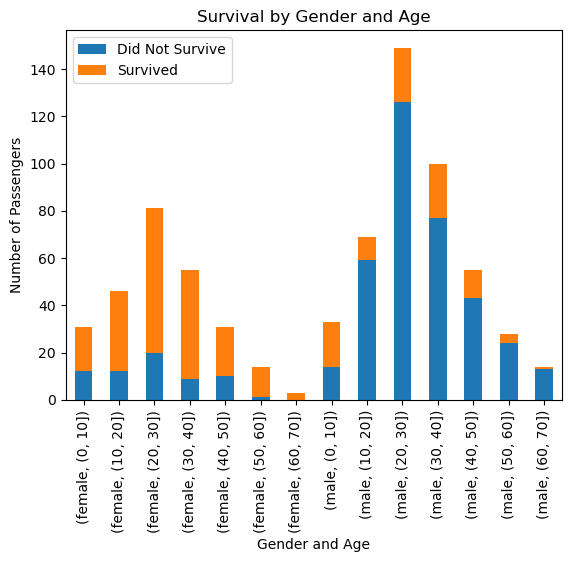

In [182]:
# Group the data by gender, age, and survival status
grouped = train_data.groupby(['Sex', pd.cut(train_data['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70]), 'Survived']).size().unstack()

# Create a stacked bar chart
fig, ax = plt.subplots()
grouped.plot(kind='bar', stacked=True, ax=ax)

# Add labels and legend
ax.set_xlabel('Gender and Age')
ax.set_ylabel('Number of Passengers')
ax.set_title('Survival by Gender and Age')
ax.legend(['Did Not Survive', 'Survived'], loc='best')

# Show the plot
plt.show()


In [183]:
import plotly.express as px

# Group the data by the Sex, Is_Child, and Survived columns
grouped = train_data.groupby(['Sex', 'Passenger_Age_Type', 'Survived']).size().reset_index(name='count')

# Define the labels for each level of the pie chart
sex_labels = ['Female', 'Male']
child_labels = ['Adult', 'Child']
survival_labels = ['Not Survived', 'Survived']

# Create the pie chart
fig = px.sunburst(grouped, path=['Sex', 'Passenger_Age_Type', 'Survived'], values='count', 
                  color='Survived', color_discrete_sequence=px.colors.qualitative.Dark2,
                  labels={'Sex': 'Sex', 'Is_Child': 'Passenger Age Type', 'Survived': 'Survived'},
                  branchvalues='total')

# Update the layout
fig.update_layout(title='Passenger Survival by Sex, Is_Child, and Survived',
                  font=dict(size=12), margin=dict(l=0, r=0, t=30, b=0))

# Show the figure
fig.show()

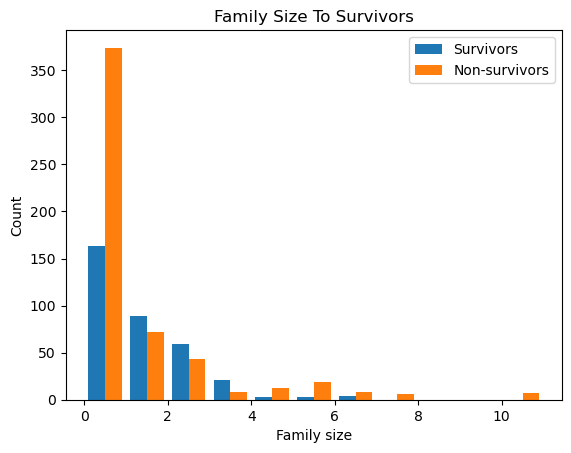

In [184]:
survivors = train_data[train_data['Survived'] == 1]['Family_Size']
non_survivors = train_data[train_data['Survived'] == 0]['Family_Size']
plt.hist([survivors, non_survivors], bins=range(12), label=['Survivors', 'Non-survivors'])
plt.legend()
plt.xlabel('Family size')
plt.ylabel('Count')
plt.title('Family Size To Survivors')
plt.show()

Text(0.5, 1.0, 'Correlation Mean Age to Survivors')

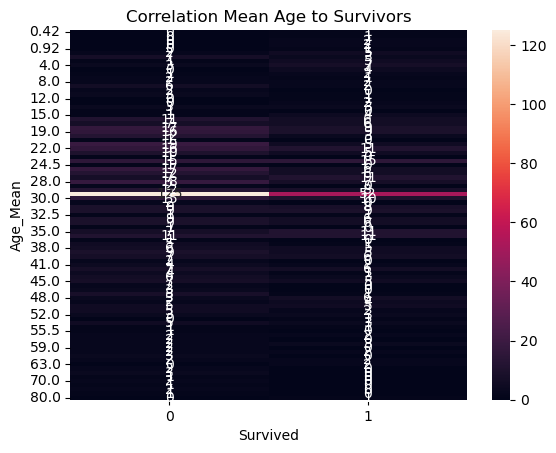

In [185]:
# Create a contingency table of sex and survival
contingency_table = pd.crosstab(train_data['Age_Mean'], train_data['Survived'])

# Visualize the contingency table as a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Correlation Mean Age to Survivors')

**Light color in the top left corner:** A weak or no correlation between the first feature in the row and the first feature in the column.
**Dark color in the bottom left corner:** A strong negative correlation between the first feature in the row and the second feature in the column.
**Dark color in the bottom right corner:** A strong positive correlation between the second feature in the row and the second feature in the column.
**Purple color in the top right corner:** A weak to moderate positive correlation between the second feature in the row and the first feature in the column.

In [186]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_Num,Cabin_A,...,Cabin_U,Age_Mean,Age_Median,Age_Random,Embarked_Mean,Embarked_Median,Embarked_Random,Is_Child,Family_Size,Is_Expansive_Ticket
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.001208,0.042939,-0.003256,...,-0.019919,0.033207,0.034212,0.005390,0.000342,0.001205,0.001205,-0.024874,-0.040143,0.016515
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.169966,-0.543351,0.022287,...,-0.316912,-0.069809,-0.064910,-0.040565,0.009421,-0.168240,-0.168240,0.122239,0.016639,0.244339
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.245733,0.131900,-0.204934,...,0.725541,-0.331339,-0.339898,-0.290136,-0.001605,0.243292,0.243292,0.125620,0.065997,-0.613314
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.038268,0.093254,0.136309,...,-0.249732,1.000000,1.000000,1.000000,0.062047,-0.036261,-0.036261,-0.617063,-0.301914,0.134357
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.060074,-0.114631,-0.046266,...,0.040460,-0.232625,-0.233296,-0.222907,-0.004519,0.059528,0.059528,0.324068,0.890712,0.260246
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.011588,-0.245489,-0.040325,...,-0.036987,-0.179191,-0.172482,-0.177036,-0.018250,0.011069,0.011069,0.317670,0.783111,0.214593
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.270731,-0.182333,0.019549,...,-0.482075,0.091566,0.096688,0.076593,-0.033066,-0.269335,-0.269335,-0.007546,0.217138,0.666940
Embarked,0.001208,-0.169966,0.245733,-0.038268,0.060074,0.011588,-0.270731,1.000000,0.084520,-0.092924,...,0.211375,-0.033853,-0.032098,-0.025424,1.000000,1.000000,1.000000,-0.022822,0.046852,-0.233787
Sex_Num,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,0.084520,1.000000,0.078271,...,0.140391,0.084153,0.081163,0.070807,-0.037686,0.082853,0.082853,-0.107150,-0.200988,-0.163802
Cabin_A,-0.003256,0.022287,-0.204934,0.136309,-0.046266,-0.040325,0.019549,-0.092924,0.078271,1.000000,...,-0.240136,0.121920,0.121732,0.089165,-0.032349,-0.093040,-0.093040,-0.023655,-0.051767,0.132311


<AxesSubplot:>

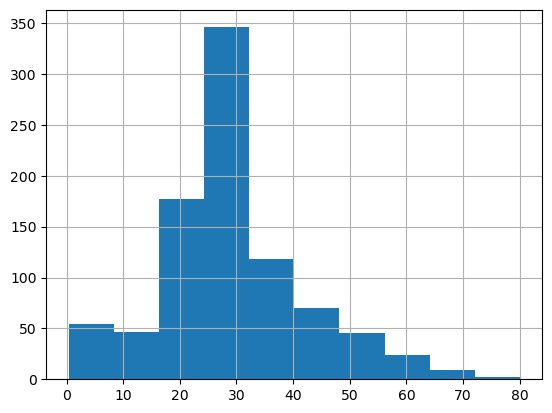

In [187]:
#sns.heatmap(train_data[['Age_Mean','Survived']])
train_data['Age_Mean'].hist()

Text(0.5, 1.0, 'Correlation  to Survivors')

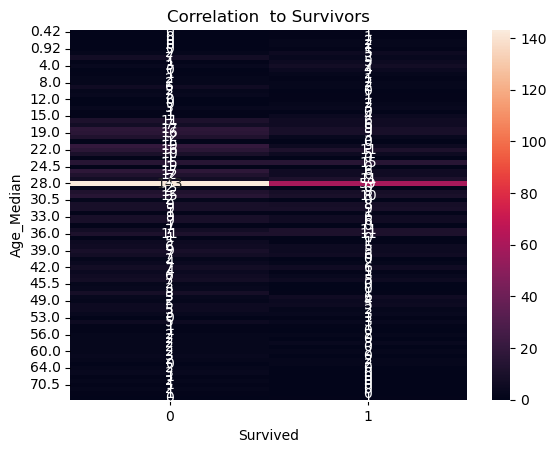

In [188]:
# Create a contingency table of sex and survival
contingency_table = pd.crosstab(train_data['Age_Median'], train_data['Survived'])

# Visualize the contingency table as a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Correlation  to Survivors')

In [189]:
train_data['Age_Random']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    20.0
889    26.0
890    32.0
Name: Age_Random, Length: 891, dtype: float64

Text(0.5, 1.0, 'Correlation Random Age to Survivors')

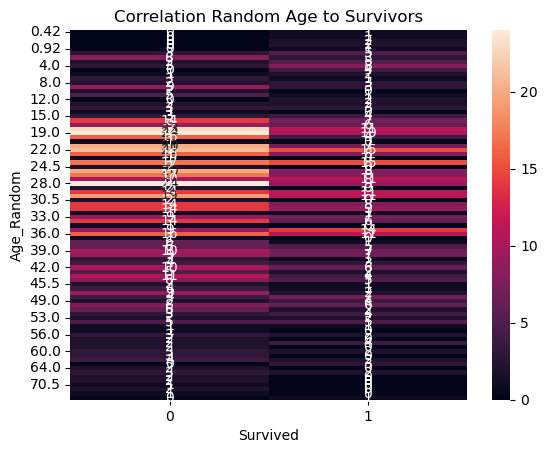

In [190]:
# Create a contingency table of sex and survival
contingency_table = pd.crosstab(train_data['Age_Random'], train_data['Survived'])

# Visualize the contingency table as a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Correlation Random Age to Survivors')

Text(0.5, 1.0, 'Another Correlation Family Size to Survivors')

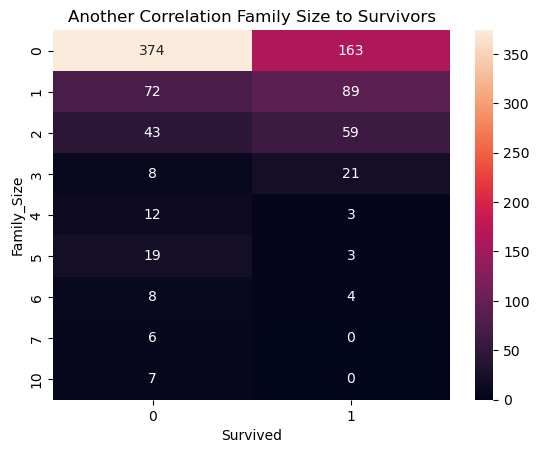

In [191]:
# Create a contingency table of sex and survival
contingency_table = pd.crosstab(train_data['Family_Size'], train_data['Survived'])

# Visualize the contingency table as a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Another Correlation Family Size to Survivors')

Text(0.5, 1.0, 'Correlation Expansive Ticket to Survivors')

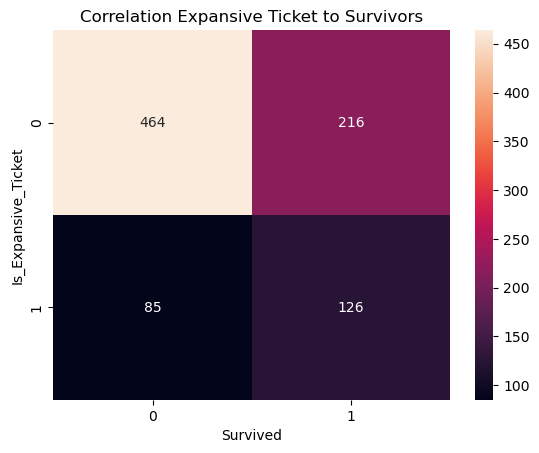

In [192]:
# Create a contingency table of sex and survival
contingency_table = pd.crosstab(train_data['Is_Expansive_Ticket'], train_data['Survived'])

# Visualize the contingency table as a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Correlation Expansive Ticket to Survivors')


Text(0.5, 1.0, 'Correlation Is Child to Survivors')

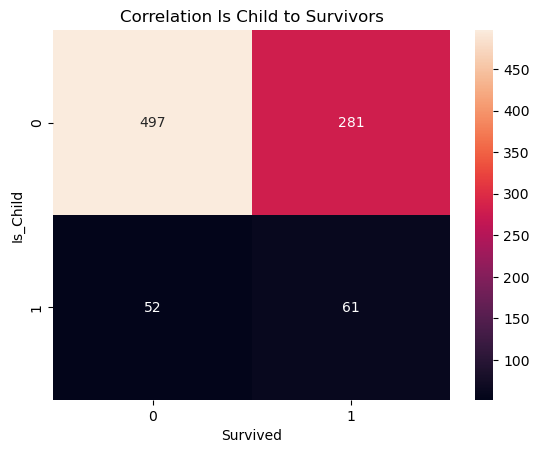

In [193]:
# Create a contingency table of sex and survival
contingency_table = pd.crosstab(train_data['Is_Child'], train_data['Survived'])

# Visualize the contingency table as a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Correlation Is Child to Survivors')

In [194]:
# Create a contingency table of sex and survival
#contingency_table = pd.crosstab(train_data['Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_T', 'Cabin_U'], train_data['Survived'])

# Visualize the contingency table as a heatmap
#sns.heatmap(contingency_table, annot=True, fmt='d')
#plt.title('Correlation Expansive Ticket to Survivors')

Text(0.5, 1.0, 'Correlation Mean Embarked to Survivors')

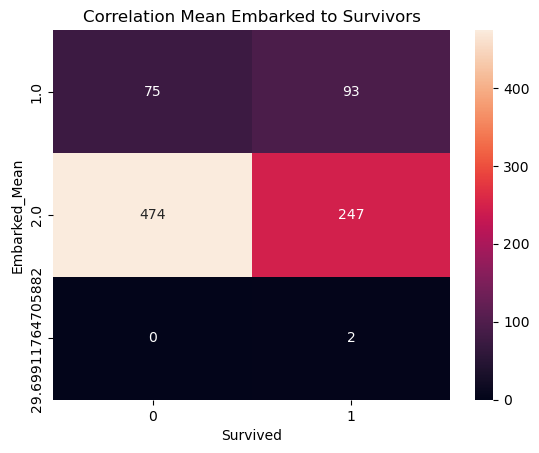

In [195]:
# Create a contingency table of sex and survival
contingency_table = pd.crosstab(train_data['Embarked_Mean'], train_data['Survived'])

# Visualize the contingency table as a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Correlation Mean Embarked to Survivors')

Text(0.5, 1.0, 'Correlation Median Embarked to Survivors')

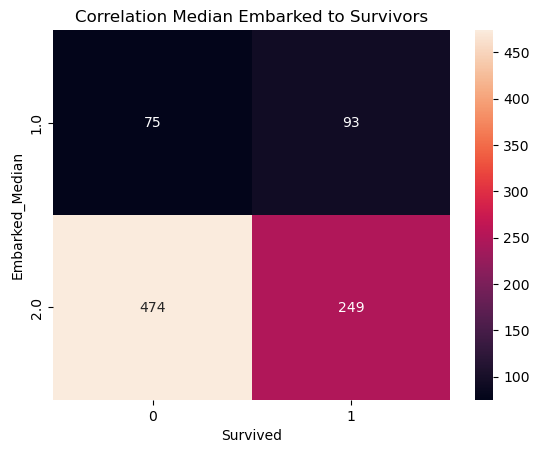

In [196]:
# Create a contingency table of sex and survival
contingency_table = pd.crosstab(train_data['Embarked_Median'], train_data['Survived'])

# Visualize the contingency table as a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Correlation Median Embarked to Survivors')

Text(0.5, 1.0, 'Correlation Random Embarked to Survivors')

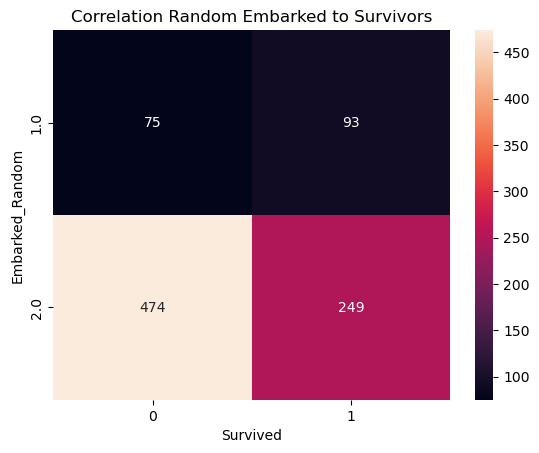

In [197]:
# Create a contingency table of sex and survival
contingency_table = pd.crosstab(train_data['Embarked_Random'], train_data['Survived'])

# Visualize the contingency table as a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.title('Correlation Random Embarked to Survivors')

# Conclusions From Data Visualition

1. The correlation between Random Age to Survivors its weak, so we will drop it from our train_data

# Removing Unnecessary Features

In [198]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Passenger_Age_Type', 'Sex', 'Age', 'Embarked', 'Age_Random', 'SibSp', 'Parch'], axis=1)

In [199]:
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Sex', 'Age'], axis=1)

In [200]:
null_values = train_data.isna().sum().sort_values(ascending=False)
total_count = len(train_data) 
#calculate the percentage for the current column 
missing_percentage = round((null_values / total_count) * 100, 2)
pd.DataFrame({'NaN: %': missing_percentage}).head()

,NaN: %
Survived,0.0
Cabin_T,0.0
Family_Size,0.0
Is_Child,0.0
Embarked_Random,0.0


In [201]:
print("train_data:")
train_data.head(50)

train_data:


,Survived,Pclass,Fare,Sex_Num,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,...,Cabin_T,Cabin_U,Age_Mean,Age_Median,Embarked_Mean,Embarked_Median,Embarked_Random,Is_Child,Family_Size,Is_Expansive_Ticket
0,0,3,7.2500,1,0,0,0,0,0,0,...,0,1,22.000000,22.0,2.0,2.0,2.0,0,1,0
1,1,1,71.2833,0,0,0,1,0,0,0,...,0,0,38.000000,38.0,1.0,1.0,1.0,0,1,1
2,1,3,7.9250,0,0,0,0,0,0,0,...,0,1,26.000000,26.0,2.0,2.0,2.0,0,0,0
3,1,1,53.1000,0,0,0,1,0,0,0,...,0,0,35.000000,35.0,2.0,2.0,2.0,0,1,1
4,0,3,8.0500,1,0,0,0,0,0,0,...,0,1,35.000000,35.0,2.0,2.0,2.0,0,0,0
5,0,3,8.4583,1,0,0,0,0,0,0,...,0,1,29.699118,28.0,2.0,2.0,2.0,0,0,0
6,0,1,51.8625,1,0,0,0,0,1,0,...,0,0,54.000000,54.0,2.0,2.0,2.0,0,0,1
7,0,3,21.0750,1,0,0,0,0,0,0,...,0,1,2.000000,2.0,2.0,2.0,2.0,1,4,0
8,1,3,11.1333,0,0,0,0,0,0,0,...,0,1,27.000000,27.0,2.0,2.0,2.0,0,2,0
9,1,2,30.0708,0,0,0,0,0,0,0,...,0,1,14.000000,14.0,1.0,1.0,1.0,1,1,0


In [202]:
print("test_data:")
test_data.head(10)

test_data:


,Pclass,SibSp,Parch,Fare,Embarked,Sex_Num,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U
0,3,0,0,7.8292,2,1,0,0,0,0,0,0,0,1
1,3,1,0,7.0000,2,0,0,0,0,0,0,0,0,1
2,2,0,0,9.6875,2,1,0,0,0,0,0,0,0,1
3,3,0,0,8.6625,2,1,0,0,0,0,0,0,0,1
4,3,1,1,12.2875,2,0,0,0,0,0,0,0,0,1
5,3,0,0,9.2250,2,1,0,0,0,0,0,0,0,1
6,3,0,0,7.6292,2,0,0,0,0,0,0,0,0,1
7,2,1,1,29.0000,2,1,0,0,0,0,0,0,0,1
8,3,0,0,7.2292,1,0,0,0,0,0,0,0,0,1
9,3,2,0,24.1500,2,1,0,0,0,0,0,0,0,1


In [203]:

# calculate score for each group
def calculate_score(X_train, t_train, X_test, t_test):
    # Use the trained algorithm to predict the classes of the testing data
    print('R2: its a measure of how well the model fits the data')
    print('R2 score on train',NE_reg.score(X_train, t_train))
    print('R2 score on test',NE_reg.score(X_test, t_test))
    
    #make predictions on the testing data
    y_train = NE_reg.predict(X_train)
    y_test = NE_reg.predict(X_test)
    print()
    print('MSE: its a measure of how far the predicted values are from the actual values')
    print('MSE on train',metrics.mean_squared_error(t_train, y_train))
    print('MSE on test',metrics.mean_squared_error(t_test, y_test))
    print()
    print('RMSE: It gives an idea of how far the predicted values are from the actual values on average')
    print('RMSE on train',metrics.mean_squared_error(t_train, y_train, squared=False))
    print('RMSE on test',metrics.mean_squared_error(t_test, y_test, squared=False))

# Train Test Split With All Features

In [204]:
from sklearn.model_selection import train_test_split
# detach the target values from the input data
t = train_data['Survived']
X = train_data.drop('Survived', axis=1)
# Split the data into training and testing sets
X_train, X_test, t_train, t_test =sklearn.model_selection.train_test_split(X, t,
                                                                           test_size=0.2,
                                                                           random_state=2)

NameError: name 'sklearn' is not defined

In [ ]:
print('X_train:')
X_train.head(10)

In [ ]:
print('X_test:')
X_test.head(10)

# Model: LinearRegression With All Features

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the algorithm on the training data
NE_reg = linear_model.LogisticRegression().fit(X_train, t_train)

calculate_score(X_train, t_train, X_test, t_test)

In [ ]:
# detach the target values from the input data
t = train_data['Survived']
X = train_data.drop(['Survived', 'Age_Mean', 'Embarked_Mean', 'Embarked_Random'], axis=1)
# Split the data into training and testing sets
X_train, X_test, t_train, t_test =sklearn.model_selection.train_test_split(X, t,
                                                                           test_size=0.2,
                                                                           random_state=2)

In [ ]:
print('X_train:')
X_train.head(10)

In [ ]:
print('X_test:')
X_test.head(10)

In [ ]:
# Train the algorithm on the training data
NE_reg = linear_model.LogisticRegression().fit(X_train, t_train)

calculate_score(X_train, t_train, X_test, t_test)

# Model: SGDClassifier With All Features

In [ ]:
# detach the target values from the input data
t = train_data['Survived']
X = train_data.drop('Survived', axis=1)
# Split the data into training and testing sets
X_train, X_test, t_train, t_test =sklearn.model_selection.train_test_split(X, t,
                                                                           test_size=0.2,
                                                                           random_state=2)

In [ ]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
     linear_model.SGDClassifier(loss='log', alpha=0,
                                learning_rate='constant',
                                eta0=0.01)
     ).fit(X_train, t_train)

y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)

y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)

print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

In [ ]:
# print the accuracy score and CE loss of the train and test
print('Accuracy score on train',
      SGD_cls.score(X_train, t_train))
print('Accuracy score on test',
      SGD_cls.score(X_test, t_test))
print()
print('CE on train',
      metrics.log_loss(t_train, y_train_prob))
print('CE on test', 
      metrics.log_loss(t_test, y_test_prob))